# **Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# **Data**

In [2]:
df = pd.read_csv('data/SUS_Simulador_Aposentadoria.csv')
df

,ID,Você conhece e já utilizou o Simulador de Aposentadoria no SOUGOV.BR?,Acho que gostaria de utilizar o Simulador de Aposentadoria com frequência,1\nAcho que gostaria de utilizar o Simulador de Aposentadoria com frequência,Eu achei o Simulador de Aposentadoria muito complexo,2\nEu achei o Simulador de Aposentadoria muito complexo,Eu achei o Simulador de Aposentadoria fácil de usar,3\nEu achei o Simulador de Aposentadoria fácil de usar,Eu acho que precisaria de ajuda de uma pessoa com conhecimentos específicos para usar o Simulador de Aposentadoria,4\nEu acho que precisaria de ajuda de uma pessoa com conhecimentos específicos para usar o Simulador de Aposentadoria,...,Eu achei o Simulador de Aposentadoria difícil de usar,8\nEu achei o Simulador de Aposentadoria difícil de usar,Eu me senti confiante usando o Simulador de Aposentadoria,9\nEu me senti confiante usando o Simulador de Aposentadoria,"Eu precisei aprender várias coisas novas antes de conseguir usar o Simulador de Aposentadoria. ,opcao:","10\nEu precisei aprender várias coisas novas antes de conseguir usar o Simulador de Aposentadoria. ,opcao:2","Agradeço a sua participação e abro o espaço para que você possa contribuir com alguma crítica, sugestão ou elogio sobre o Simulador de Aposentadoria.","Some a pontuação total de todas as questões ímpares (questões 1, 3, 5, 7 e 9) e, em seguida, subtraia 5 do total para obter (X).","Some a pontuação total de todas as questões de número par (questões 2, 4, 6, 8 e 10), então subtraia esse total de 25 para obter (Y).","Some a pontuação total dos novos valores (X+Y) e multiplique por 2,5."
0,3,Sim,Concordo totalmente,5,Discordo totalmente,1,Concordo totalmente,5,Discordo totalmente,1,...,Discordo totalmente,1,Discordo totalmente,1,Discordo totalmente,1,NaN,16,20,90
1,9,Sim,Discordo parcialmente,2,Concordo totalmente,5,Discordo totalmente,1,Concordo totalmente,5,...,Concordo totalmente,5,Discordo totalmente,1,"Não concordo, nem discordo",3,NaN,1,4,"12,5"
2,13,Sim,Concordo parcialmente,4,"Não concordo, nem discordo",3,"Não concordo, nem discordo",3,"Não concordo, nem discordo",3,...,Concordo parcialmente,4,Discordo parcialmente,2,Concordo totalmente,5,NaN,8,7,"37,5"
3,15,Sim,Concordo parcialmente,4,Concordo parcialmente,4,Concordo parcialmente,4,Discordo parcialmente,2,...,Concordo totalmente,5,Concordo totalmente,5,"Não concordo, nem discordo",3,NaN,17,10,"67,5"
4,16,Sim,Concordo totalmente,5,Concordo parcialmente,4,Discordo parcialmente,2,Discordo totalmente,1,...,Concordo totalmente,5,Concordo parcialmente,4,Discordo totalmente,1,"Ótima iniciativa, mas não funcionou comigo",12,9,"52,5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250,4858,Sim,Concordo parcialmente,4,Concordo parcialmente,4,Discordo parcialmente,2,Concordo parcialmente,4,...,Concordo parcialmente,4,Discordo parcialmente,2,"Não concordo, nem discordo",3,Incluir um módulo relativo ao servidor com def...,8,7,"37,5"
2251,4859,Sim,"Não concordo, nem discordo",3,Concordo parcialmente,4,Discordo parcialmente,2,Concordo parcialmente,4,...,Concordo parcialmente,4,Discordo parcialmente,2,"Não concordo, nem discordo",3,NaN,7,7,35
2252,4860,Sim,Concordo totalmente,5,Discordo totalmente,1,Concordo totalmente,5,Discordo totalmente,1,...,Discordo totalmente,1,Concordo totalmente,5,Discordo totalmente,1,NaN,20,20,100
2253,4861,Sim,Concordo parcialmente,4,Discordo parcialmente,2,"Não concordo, nem discordo",3,"Não concordo, nem discordo",3,...,Discordo parcialmente,2,"Não concordo, nem discordo",3,"Não concordo, nem discordo",3,NaN,11,14,"62,5"


# **Quantitative Evaluation Based on Multiple-Choice Selections Made by Users**

* **Total number of people who commented**

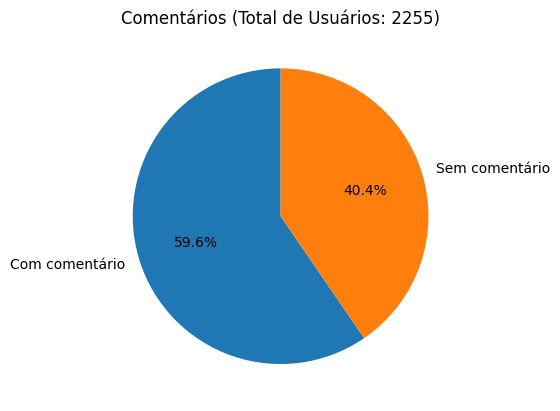

In [3]:
total_no_comments = df['Agradeço a sua participação e abro o espaço para que você possa contribuir com alguma crítica, sugestão ou elogio sobre o Simulador de Aposentadoria.'].isnull().sum()
total_with_comments = len(df) - total_no_comments
plt.pie([total_with_comments, total_no_comments], labels=['Com comentário', 'Sem comentário'], autopct='%1.1f%%', startangle=90)
plt.title(f'Comentários (Total de Usuários: {len(df)})')
plt.show()

* **Analyzing Users' Multiple-Choice Responses**

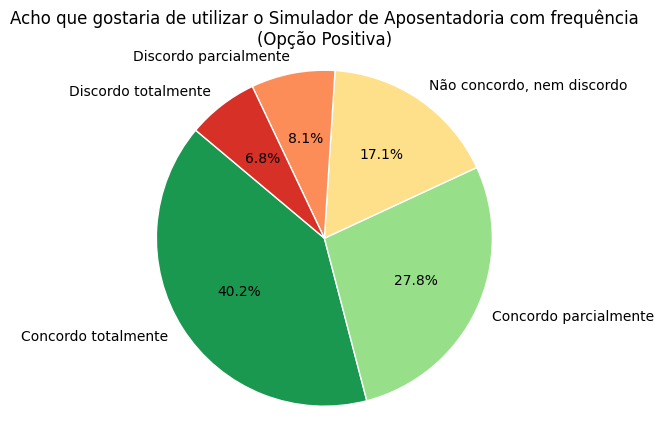

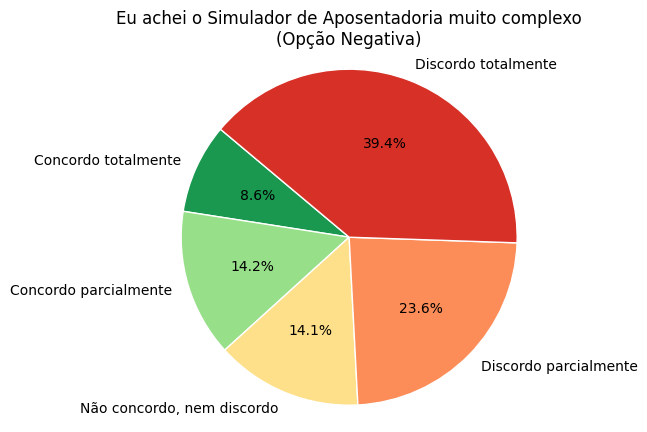

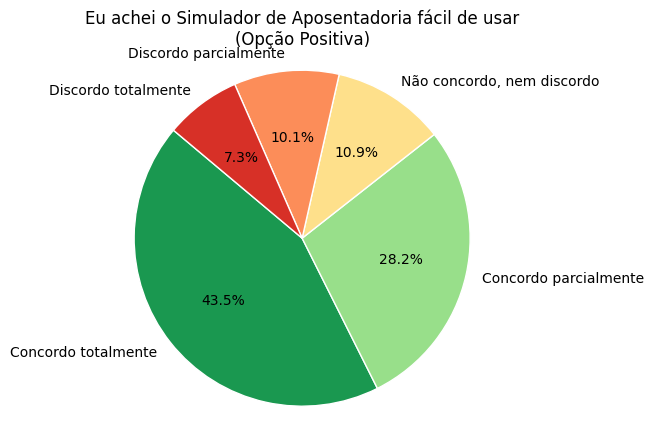

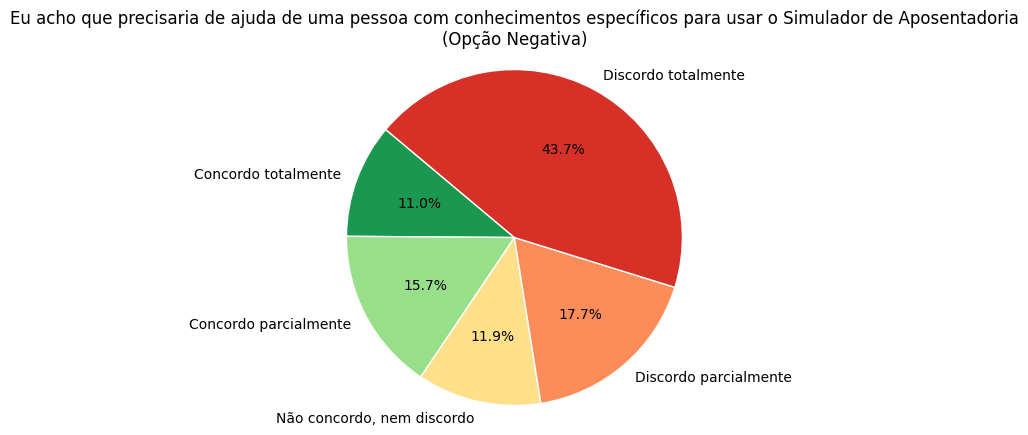

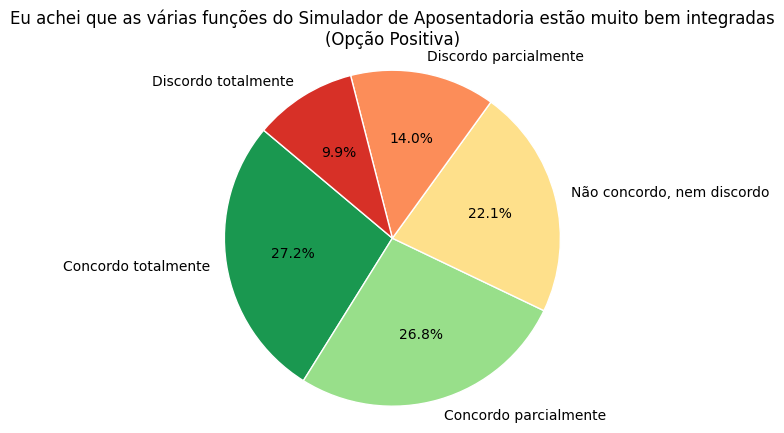

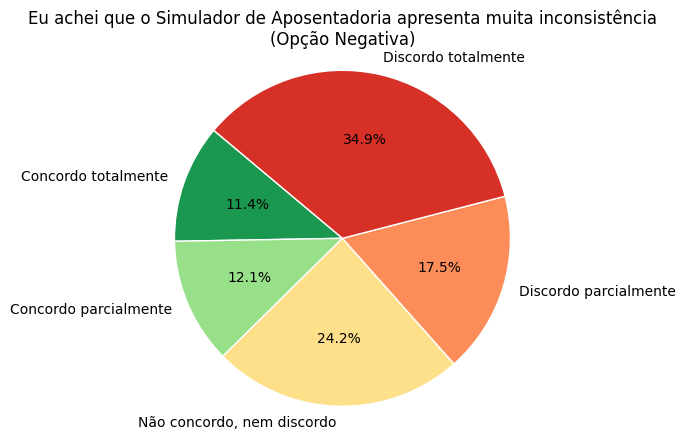

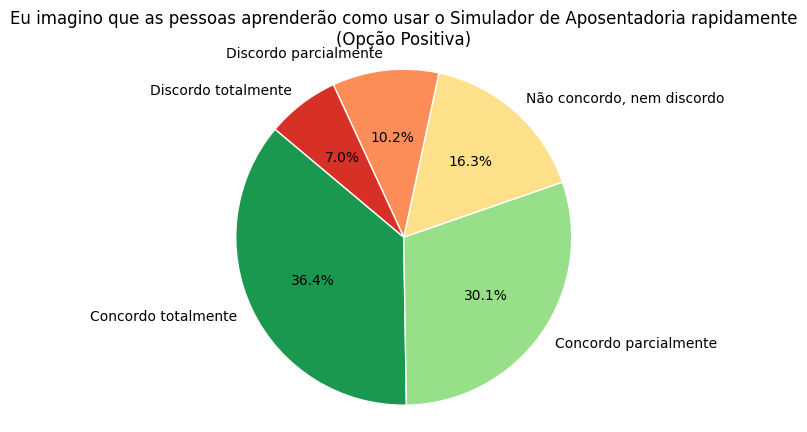

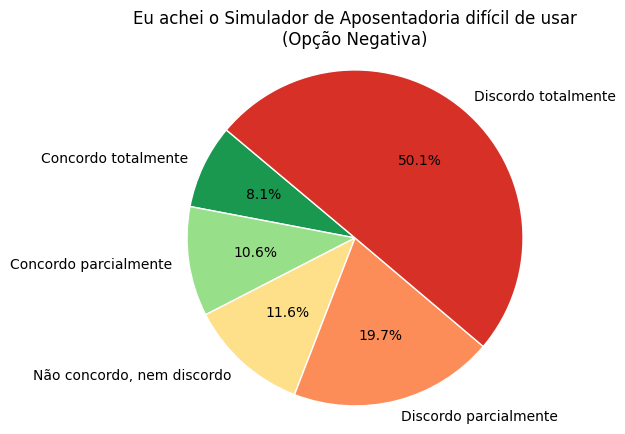

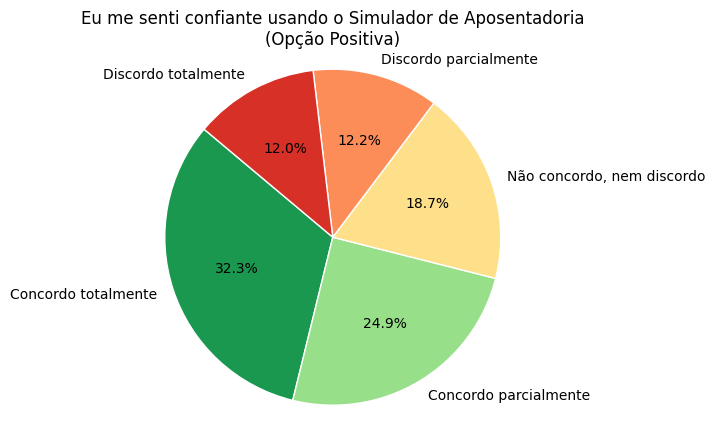

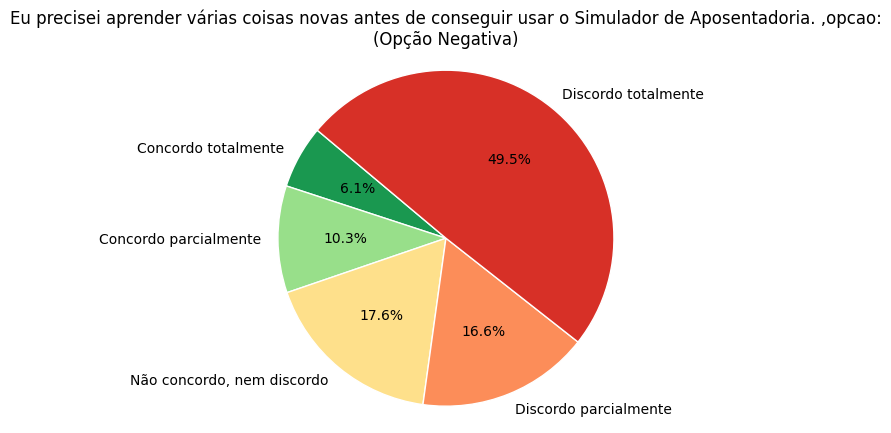

In [4]:
custom_palette = ['#1a9850', '#98df8a', '#fee08b', '#fc8d59', '#d73027']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_palette)

answers_order = [
    "Concordo totalmente",
    "Concordo parcialmente",
    "Não concordo, nem discordo",
    "Discordo parcialmente",
    "Discordo totalmente"
]

questions = []
for column in list(df.columns)[2:-4]: # selecting only the multiple-choice responses
    flag = False
    for value in range(10):
        if str(value) in column: 
            flag = True
            break
    if not flag: questions.append(column)
        
for index, question in enumerate(questions):
    answers = df[question].value_counts()
    answers = answers.reindex(answers_order).fillna(0) 
    
    plt.pie(answers, labels=answers.index, colors=custom_palette, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='white', linewidth=1))
    
    if index%2 == 0: 
        title = question + '\n(Opção Positiva)'
    else:
        title = question + '\n(Opção Negativa)'
    
    plt.title(title)
    plt.axis('equal')
    plt.show()
    plt.close()